In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]


In [3]:
print(len(messages))

5574


In [6]:
for msg_no,message in enumerate(messages[:10]):
    print(msg_no,message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import pandas as pd

In [5]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [6]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [9]:
messages['length']=messages['message'].apply(len)

messages.head()

In [10]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

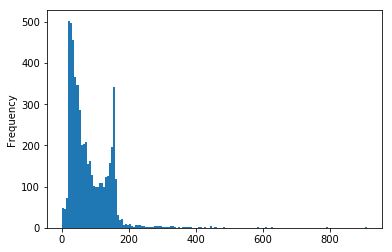

In [12]:
messages.length.plot.hist(bins=150)

In [13]:
messages.describe

<bound method NDFrame.describe of      labels                                            message  length
0       ham  Go until jurong point, crazy.. Available only ...     111
1       ham                      Ok lar... Joking wif u oni...      29
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3       ham  U dun say so early hor... U c already then say...      49
4       ham  Nah I don't think he goes to usf, he lives aro...      61
5      spam  FreeMsg Hey there darling it's been 3 week's n...     147
6       ham  Even my brother is not like to speak with me. ...      77
7       ham  As per your request 'Melle Melle (Oru Minnamin...     160
8      spam  WINNER!! As a valued network customer you have...     157
9      spam  Had your mobile 11 months or more? U R entitle...     154
10      ham  I'm gonna be home soon and i don't want to tal...     109
11     spam  SIX chances to win CASH! From 100 to 20,000 po...     136
12     spam  URGENT! You have won a 1 week 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A088023080>,
      dtype=object)

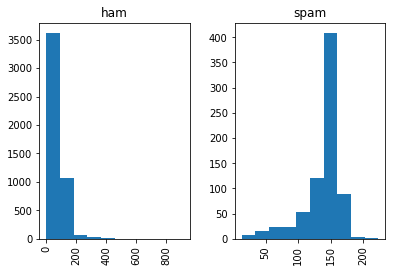

In [14]:
messages.hist(column='length',by='labels')

In [15]:
import string
from nltk.corpus import stopwords

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in 'C:\\Users\\sony\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>>

In [18]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

In [19]:
messages['message'].apply(text_process)

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, dont, think, he, goes, to, usf, he, l...
5       [FreeMsg, Hey, there, darling, its, been, 3, w...
6       [Even, my, brother, is, not, like, to, speak, ...
7       [As, per, your, request, Melle, Melle, Oru, Mi...
8       [WINNER, As, a, valued, network, customer, you...
9       [Had, your, mobile, 11, months, or, more, U, R...
10      [Im, gonna, be, home, soon, and, i, dont, want...
11      [SIX, chances, to, win, CASH, From, 100, to, 2...
12      [URGENT, You, have, won, a, 1, week, FREE, mem...
13      [Ive, been, searching, for, the, right, words,...
14             [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
15      [XXXMobileMovieClub, To, use, your, credit, cl...
16                              [Oh, kim, watching, here]
17      [Eh, u

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_tranformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [26]:
messages_bow=bow_tranformer.transform(messages['message'])

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [33]:
message_tfidf=tfidf_transformer.transform(messages_bow)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
ln=MultinomialNB().fit(message_tfidf,messages['labels'])

In [37]:
all_predict=ln.predict(message_tfidf)

In [38]:
all_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [39]:
from sklearn.cross_validation import train_test_split

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['labels'],test_size=0.3)

In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [42]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000A0881E6D90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [43]:
predictions = pipeline.predict(msg_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(predictions,label_test))


             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1537
       spam       0.62      1.00      0.77       135

avg / total       0.97      0.95      0.96      1672

